## 2021년 10월 27일 스터디
**Dacon 교육 - [공공] 서울시 따릉이 자전거 이용 예측 AI모델**

2021/10/27 목주영

<span style="color:blue">**인사이트, 아쉬운 사항 제기 및 보완**</span>
- feature를 2개만 추가하여 머신러닝을 돌린 것이 아쉽다. 특성을 더 추가했을 때 score가 어떻게 바뀌는 지 알아보자.

## 탐색적 자료분석
## Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
train = pd.read_csv('train.csv') # 모델 학습 파일
test = pd.read_csv('test.csv')# 모델 시험지 파일
submission = pd.read_csv('submission.csv')#답안지 파일 

In [3]:
print(train.shape)
print(test.shape)
print(submission.shape)

(1459, 11)
(715, 10)
(715, 2)


<AxesSubplot:>

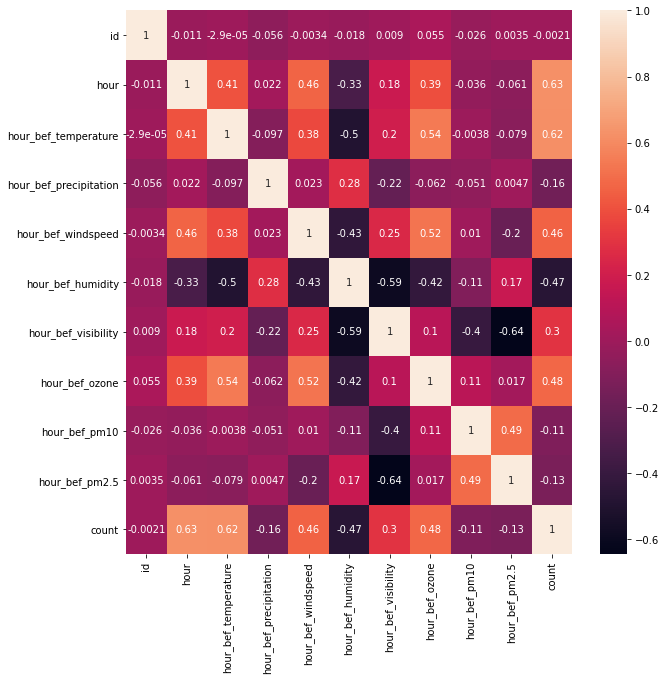

In [4]:
#train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True) #annot=True 상관계수 수치 

## 데이터 전처리
## Data Cleansing & Pre-Processing  

<span style="color:red">train set의 hour_bef_temperature 특성의 결측치 채워주기</span>

In [5]:
train.isna().sum() #결측치 확인

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [6]:
#시간별 평균온도
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [7]:
#시간별 평균온도로 결측값 대체
#934번 0시 평균온도인 14.788136도로 대체, 1035번 18시 평균온도인 20.926667도로 대체
train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace = True)

In [8]:
train.loc[[934, 1035], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
train[train['hour_bef_temperature'].isna()]
# 결측치 없어짐

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


<span style="color:red">train set의 hour_bef_windspeed 특성의 결측치 채워주기</span>

In [10]:
#hour_bef_windspeed도 마찬가지로 시간별 풍속 평균으로 결측치 채워줌
train[train['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,NaN,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,NaN,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,NaN,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,NaN,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,NaN,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,NaN,52.0,2000.0,0.044,37.0,20.0,20.0


In [11]:
train[train['hour_bef_windspeed'].isna()].index

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [12]:
#시간별 평균 풍속
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [13]:
#시간별 평균풍속으로 결측값 대체
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333}, inplace = True)

In [14]:
train.loc[[18, 244, 260, 376, 780, 934, 1035, 1138, 1229], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,3.281356,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,1.836667,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,1.620000,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,1.965517,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,3.278333,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,2.766667,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,1.633333,52.0,2000.0,0.044,37.0,20.0,20.0


<span style="color:blue">[추가] train set의 hour_bef_humidity 특성의 결측치 채워주기</span>

In [15]:
train[train['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0


In [16]:
train.groupby('hour').mean()['hour_bef_humidity']

hour
0     58.169492
1     60.459016
2     61.721311
3     63.131148
4     64.573770
5     66.000000
6     67.409836
7     67.934426
8     64.049180
9     57.803279
10    51.622951
11    46.262295
12    42.147541
13    38.850000
14    37.573770
15    37.393443
16    36.450000
17    38.883333
18    40.450000
19    43.573770
20    47.573770
21    50.450000
22    53.950820
23    56.393443
Name: hour_bef_humidity, dtype: float64

In [17]:
train['hour_bef_humidity'].fillna({934:58.169492, 1035:40.450000}, inplace = True)

In [18]:
train.loc[[934, 1035], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,58.169492,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,40.450000,NaN,NaN,NaN,NaN,1.0


In [19]:
train[train['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


In [20]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

<span style="color:blue">[추가] train set의 hour_bef_visibility 특성의 결측치 채워주기</span>

In [21]:
train[train['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,58.169492,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,40.450000,NaN,NaN,NaN,NaN,1.0


In [22]:
train.groupby('hour').mean()['hour_bef_visibility']

hour
0     1434.220339
1     1400.852459
2     1374.278689
3     1326.311475
4     1264.606557
5     1203.426230
6     1146.229508
7     1150.311475
8     1152.868852
9     1189.098361
10    1291.295082
11    1358.868852
12    1469.606557
13    1512.266667
14    1519.721311
15    1528.065574
16    1566.583333
17    1561.733333
18    1581.850000
19    1576.688525
20    1565.557377
21    1590.016667
22    1512.081967
23    1462.508197
Name: hour_bef_visibility, dtype: float64

In [23]:
train['hour_bef_visibility'].fillna({934:1434.220339, 1035:1581.850000}, inplace = True)

In [24]:
train.loc[[934, 1035], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,1.965517,58.169492,1434.220339,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,40.450000,1581.850000,NaN,NaN,NaN,1.0


In [25]:
train[train['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


<span style="color:blue">[추가] train set의 hour_bef_ozone 특성의 결측치 채워주기</span>

In [26]:
train[train['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
84,130,1,9.4,0.0,2.5,65.0,1907.0,NaN,NaN,NaN,39.0
122,181,16,26.2,0.0,4.3,31.0,1718.0,NaN,47.0,23.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...
1283,1941,1,16.6,0.0,2.1,35.0,2000.0,NaN,NaN,NaN,62.0
1322,1994,1,15.1,0.0,1.3,35.0,2000.0,NaN,NaN,NaN,40.0
1329,2005,1,17.7,0.0,1.0,43.0,1338.0,NaN,NaN,NaN,69.0
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0


In [27]:
train.groupby('hour').mean()['hour_bef_ozone'].mean()

0.03926531324465141

In [28]:
#결측치가 너무 많으므로 결측치 전체에 mean값 넣어줌..........
train['hour_bef_ozone'].fillna(0.03926531324465141, inplace = True)

In [29]:
train[train['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count


<span style="color:red">test set의 hour_bef_temperature과 hour_bef_windspeed 특성의 결측치 채워주기</span>

In [30]:
#test set도 마찬가지로 우리가 사용할 변수들인
#hour_bef_temperature과 hour_bef_windspeed의 결측값 제거해줌
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [31]:
test[test['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
train.groupby('hour').mean()['hour_bef_temperature'][19]

19.704918032786885

In [33]:
test['hour_bef_temperature'].fillna(19.704918032786885, inplace = True)

In [34]:
test[test['hour_bef_windspeed'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
train.groupby('hour').mean()['hour_bef_windspeed'][19]

3.595081967213115

In [36]:
test['hour_bef_windspeed'].fillna(3.595081967213115, inplace = True)

In [37]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [38]:
test.loc[[653], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,3.595082,NaN,NaN,NaN,NaN,NaN


In [39]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

<span style="color:blue">[추가] test set도 마찬가지로 우리가 추가한 특성의 결측치 채워주기</span><br>
<span style="color:blue">- hour_bef_humidity</span>

In [40]:
test[test['hour_bef_humidity'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,3.595082,NaN,NaN,NaN,NaN,NaN


In [41]:
train.groupby('hour').mean()['hour_bef_humidity'][19]

43.57377049180328

In [42]:
test['hour_bef_humidity'].fillna(43.57377049180328, inplace = True)

In [43]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

<span style="color:blue">- hour_bef_visibility</span>

In [44]:
test[test['hour_bef_visibility'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,19.704918,NaN,3.595082,43.57377,NaN,NaN,NaN,NaN


In [45]:
train.groupby('hour').mean()['hour_bef_visibility'][19]

1576.688524590164

In [46]:
test['hour_bef_visibility'].fillna(1576.688524590164, inplace = True)

In [47]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

<span style="color:blue">- hour_bef_ozone</span>

In [48]:
test[test['hour_bef_ozone'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
32,82,1,22.800000,0.0,2.400000,52.00000,2000.000000,NaN,NaN,NaN
40,115,1,21.500000,1.0,0.500000,90.00000,347.000000,NaN,NaN,NaN
47,147,1,22.800000,0.0,1.200000,57.00000,1190.000000,NaN,NaN,NaN
86,260,1,20.000000,0.0,2.000000,65.00000,1662.000000,NaN,NaN,NaN
92,270,1,20.000000,0.0,1.700000,31.00000,2000.000000,NaN,NaN,NaN
102,297,1,15.100000,1.0,2.200000,98.00000,224.000000,NaN,NaN,NaN
114,323,1,18.700000,0.0,1.400000,41.00000,2000.000000,NaN,NaN,NaN
126,352,1,19.200000,0.0,1.400000,80.00000,1085.000000,NaN,NaN,NaN
129,358,1,23.600000,0.0,0.900000,83.00000,466.000000,NaN,NaN,NaN
209,609,1,18.600000,0.0,2.400000,37.00000,2000.000000,NaN,NaN,NaN


In [49]:
train.groupby('hour').mean()['hour_bef_ozone'].mean()

0.039186346602781454

In [50]:
test['hour_bef_ozone'].fillna(0.039186346602781454, inplace = True)

In [51]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone             0
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

## 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

## 모델 학습 및 검증
## Model Tuning & Evaluation

<span style="color:blue">데이터 전처리를 완료한 특성 중 hour_bef_temperature, hour_bef_windspeed, hour_bef_humidity 특성 안에 넣음</span><br>
<span style="color:blue">(원본에서 hour_bef_humidity가 추가된 것)</span>


In [52]:
# x = features -> model -> y = count
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity']
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 4)
(1459,)
(715, 4)


In [54]:
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200, random_state=0)
model300 = RandomForestRegressor(n_estimators=300, random_state=0)

In [55]:
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)
model300.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [56]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)
ypred4 = model300.predict(X_test)

In [57]:
submission['count'] = ypred1
submission.to_csv('model100_humidity_added.csv', index = False)

In [58]:
submission['count'] = ypred2
submission.to_csv('model100_5_humidity_added.csv', index = False)

In [59]:
submission['count'] = ypred3
submission.to_csv('model200_humidity_added.csv', index = False)

In [60]:
submission['count'] = ypred4
submission.to_csv('model300_humidity_added.csv', index = False)

In [61]:
print(model100.score(X_train, y_train))
print(model100_5.score(X_train, y_train))
print(model200.score(X_train, y_train))
print(model300.score(X_train, y_train))

0.9638245937244931
0.7769376148314352
0.9648645810034436
0.9649505158198605


In [62]:
model500 = RandomForestRegressor(n_estimators=500, random_state=0)
model500.fit(X_train, y_train)
submission['count'] = model500.predict(X_test)
submission.to_csv('model500_humidity_added.csv', index = False)
print(model500.score(X_train, y_train))

0.9654685194511808


<span style="color:blue">데이터 전처리를 완료한 특성 중 hour_bef_temperature, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility 특성 안에 넣음</span><br>
<span style="color:blue">(원본에서 hour_bef_humidity와 hour_bef_visibility가 추가된 것)</span>


In [63]:
# hour_bef_humidity & hour_bef_visibility added
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility']
X_train_add = train[features]
y_train_add = train['count']
X_test_add = test[features]

In [64]:
print(X_train_add.shape)
print(y_train_add.shape)
print(X_test_add.shape)

(1459, 5)
(1459,)
(715, 5)


In [65]:
model100_add = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5_add = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200_add = RandomForestRegressor(n_estimators=200, random_state=0)
model300_add = RandomForestRegressor(n_estimators=300, random_state=0)

In [66]:
model100_add.fit(X_train_add, y_train_add)
model100_5_add.fit(X_train_add, y_train_add)
model200_add.fit(X_train_add, y_train_add)
model300_add.fit(X_train_add, y_train_add)

RandomForestRegressor(n_estimators=300, random_state=0)

In [67]:
ypred1_add = model100_add.predict(X_test_add)
ypred2_add = model100_5_add.predict(X_test_add)
ypred3_add = model200_add.predict(X_test_add)
ypred4_add = model300_add.predict(X_test_add)

In [68]:
submission['count'] = ypred1_add
submission.to_csv('model100_humidity_visibility_added.csv', index = False)

In [69]:
submission['count'] = ypred2_add
submission.to_csv('model100_5_humidity_visibility_added.csv', index = False)

In [70]:
submission['count'] = ypred3_add
submission.to_csv('model200_humidity_visibility_added.csv', index = False)

In [71]:
submission['count'] = ypred4_add
submission.to_csv('model300_humidity_visibility_added.csv', index = False)

In [72]:
print(model100_add.score(X_train_add, y_train_add))
print(model100_5_add.score(X_train_add, y_train_add))
print(model200_add.score(X_train_add, y_train_add))
print(model300_add.score(X_train_add, y_train_add))

0.9673964409224672
0.7825594915042907
0.9682110768081154
0.9680692750569834


<span style="color:blue">데이터 전처리를 완료한 특성 중 hour_bef_temperature, hour_bef_windspeed, hour_bef_humidity, hour_bef_ozone 특성 안에 넣음</span><br>
<span style="color:blue">(원본에서 hour_bef_humidity와 hour_bef_ozone 추가된 것)</span>


In [73]:
# hour_bef_humidity & hour_bef_ozone added
features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_ozone']
X_train_add = train[features]
y_train_add = train['count']
X_test_add = test[features]

In [74]:
print(X_train_add.shape)
print(y_train_add.shape)
print(X_test_add.shape)

(1459, 5)
(1459,)
(715, 5)


In [75]:
model100_add = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5_add = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200_add = RandomForestRegressor(n_estimators=200, random_state=0)
model300_add = RandomForestRegressor(n_estimators=300, random_state=0)

In [76]:
model100_add.fit(X_train_add, y_train_add)
model100_5_add.fit(X_train_add, y_train_add)
model200_add.fit(X_train_add, y_train_add)
model300_add.fit(X_train_add, y_train_add)

RandomForestRegressor(n_estimators=300, random_state=0)

In [77]:
ypred1_add = model100_add.predict(X_test_add)
ypred2_add = model100_5_add.predict(X_test_add)
ypred3_add = model200_add.predict(X_test_add)
ypred4_add = model300_add.predict(X_test_add)

In [78]:
submission['count'] = ypred1_add
submission.to_csv('model100_humidity_ozone_added.csv', index = False)

In [79]:
submission['count'] = ypred2_add
submission.to_csv('model100_5_humidity_ozone_added.csv', index = False)

In [80]:
submission['count'] = ypred3_add
submission.to_csv('model200_humidity_ozone_added.csv', index = False)

In [81]:
submission['count'] = ypred4_add
submission.to_csv('model300_humidity_ozone_added.csv', index = False)

In [82]:
print(model100_add.score(X_train_add, y_train_add))
print(model100_5_add.score(X_train_add, y_train_add))
print(model200_add.score(X_train_add, y_train_add))
print(model300_add.score(X_train_add, y_train_add))

0.9663859252612338
0.7809085647058237
0.9677247180130872
0.9676869477494632


In [83]:
model500_add = RandomForestRegressor(n_estimators=500, random_state=0)
model500_add.fit(X_train_add, y_train_add)
submission['count'] = model500_add.predict(X_test_add)
submission.to_csv('model500_humidity_ozone_added.csv', index = False)
submission

,id,count
0,0,86.078
1,1,233.650
2,2,86.070
3,4,27.856
4,5,74.214
...,...,...
710,2148,62.942
711,2149,65.600
712,2165,120.916
713,2166,146.300


In [84]:
print(model500_add.score(X_train_add, y_train_add))

0.9680394818274634


<span style="color:blue">데이터 전처리를 완료한 특성 중 hour_bef_temperature, hour_bef_humidity, hour_bef_ozone 특성 안에 넣음</span><br>
<span style="color:blue">(원본에서 hour_bef_windspeed 특성을 제거하고 hour_bef_humidity와 hour_bef_ozone 추가된 것)</span>


In [85]:
# windspeed 뺴고 humidity랑 ozone!!
features = ['hour', 'hour_bef_temperature', 'hour_bef_humidity', 'hour_bef_ozone']
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 4)
(1459,)
(715, 4)


In [87]:
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200, random_state=0)
model300 = RandomForestRegressor(n_estimators=300, random_state=0)

In [88]:
model100.fit(X_train, y_train)
model100_5.fit(X_train, y_train)
model200.fit(X_train, y_train)
model300.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [89]:
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)
ypred4 = model300.predict(X_test)

In [90]:
submission['count'] = ypred1
submission.to_csv('model100_windspeed_deleted_humidity_ozone_added.csv', index = False)

In [91]:
submission['count'] = ypred2
submission.to_csv('model100_5_windspeed_deleted_humidity_ozone_added.csv', index = False)

In [92]:
submission['count'] = ypred3
submission.to_csv('model200_windspeed_deleted_humidity_ozone_added.csv', index = False)

In [93]:
submission['count'] = ypred4
submission.to_csv('model300_windspeed_deleted_humidity_ozone_added.csv', index = False)

In [94]:
print(model100.score(X_train, y_train))
print(model100_5.score(X_train, y_train))
print(model200.score(X_train, y_train))
print(model300.score(X_train, y_train))

0.965646629624134
0.7799047260841547
0.966948408936938
0.9671463508264604


In [95]:
model500 = RandomForestRegressor(n_estimators=500, random_state=0)
model500.fit(X_train, y_train)
submission['count'] = model500.predict(X_test)
submission.to_csv('model500_windspeed_deleted_humidity_ozone_added.csv', index = False)
print(model500.score(X_train, y_train))

0.9675929148825682


- hour_bef_humidity 특성을 추가하니 score가 원본보다 나아졌음
- 특성 추가할 때 코드 더 간결하게... 한 눈에 보기 쉽게 정리할 필요 있음